In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow import keras
from keras import datasets,layers,models
from keras.layers import Dropout,Dense, Conv2D, MaxPooling2D,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

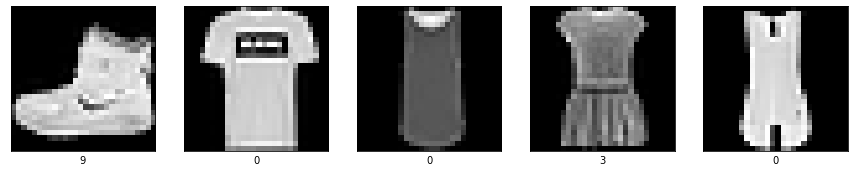

In [ ]:
plt.figure(figsize=(15,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap='gray')
  plt.xlabel(str(y_train[i]))
plt.show()  


In [ ]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from keras.utils import np_utils

In [ ]:
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

In [ ]:
y_train[3]

3

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)         

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7953 - accuracy: 0.6974
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3741 - accuracy: 0.8601
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3268 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2843 - accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2535 - accuracy: 0.9041
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2524 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2414 - accuracy: 0.9122
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.231

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2670 - accuracy: 0.9096


[0.26701876521110535, 0.909600019454956]

In [ ]:
prediction=model.predict(x_test)

In [ ]:
np.argmax(prediction[10])

4

In [ ]:
y_test[10]

4